# Assignment 1.4: Polynomial Model

* *Version 1.4: Added division by `n_samples` in gradient expression. Also inserted the transpose back in to the math expression just before the def polynomial_model line.*
* *Version 1.3: Changed 'linear model' to 'polynomial model' when referring to what to plot.*
* *Version 1.2: The mathematical expression just before `polynomial_gradient(X, T, W):` incorrectly had the transpose of the matrix of powers of X.  The transpose has been removed from this most recent version.*
* *Version 1.1: Added all details, including grading script.  Also removed the sentence the steps for defining and plotting X and T for the air quality experiments being different from lecture.  It is not different from what was done in lecture.*



ANJU GOPINATH

# PROBLEM DESCRIPTION

In this first assignment, you will write and apply python code that performs gradient descent to fit a polynomial model to the air quality data discussed in the lecture during the first week.  

## PART A - POLYNOMIAL MODEL

Write code to implement a polynomial that returns the result

$$f(x) = w_0 + w_1 x + w_2 x^2 + \cdots + w_{p-1} x^{p-1}$$

Name this function `polynomial_model` that is called with two arguments, a column matrix of input values with number of rows equal to the number of samples, and a column matrix of weights with the number of rows equal to the number of powers $p$ to use. Notice that the first term on the right-hand side is actually $w_0 x^0$.

* `polynomial_model(X, W)`:
    * Given
        * `X`, an n_samples x 1 numpy array of input samples
        * `W`, an n_powers x 1 numpy array of weight values
    * Return
        * an n_samples x 1 numpy array of the model's predicted outputs for each sample in `X`.

## PART B - POLYNOMIAL GRADIENT

Now implement the gradient of the mean-squared-error between the target values in `T` and the model's output, with respect to the weights, `W`.

$$ \begin{align*}
\nabla_W E
&= \nabla_Y E \; \nabla_W Y\\
&= -2 (T - Y) \; \nabla_W Y\\
&= -2 (T - Y) \; [1,\; x,\; x^2,\; x^3,\; \ldots,\; x^{p-1}]
\end{align*}$$

for one sample $x$.  With $X$ being a matrix of multiples samples, one per row, we must modify the equation to this. Notice the transpose of the matrix of powers of $X$.  <font color=red>The following expression is now divided by `n_samples`.</font>

$$\nabla_W E = [1,\; X,\; X^2,\; X^3,\; \ldots,\; X^{p-1}]^T \;(-2)\; (T - Y) \;/\; \text{n_samples}$$
\;
* `polynomial_gradient(X, T, W)`:
   * Given
       * `X`, an n_samples x 1 numpy array of input samples
       * `T`, an n_samples x 1 numpy array of correct outputs (targets) for each input sample
       * `W`, an n_powers x 1 numpy array of weight values
    * Return
       * an n_powers x 1 numpy array of the gradient of the mean squared error with respect to each weight. (Same shape is W.)

## PART C - AIR QUALITY DATA

### PART C.1 - READ, PREPARE DATA AND PLOT FIGURE

Download the air quality data and prepare the `X` and `T` matrices as shown in the following code cells. When done correctly, X and T should both have shape (827, 1). Plot `CO(GT)` air quality (on the y axis) versus the hour of the day (on the x axis) to verify you have prepared the data correctly.

### PART C.2 - APPLY GRADIENT DESCENT ADAM METHOD

Use the `gradient_descent_adam` function defined in the lecture notes to find the best weights for the polynomial model, as illustrated in lecture.  Plot the RMSE versus iterations, plot the weights versus the number of steps, and plot the air quality versus hour of the day again and superimpose the polynomial model on the same graph.

### PART C.3 -  OPTIMIZATION

Now apply the Adam optimization function to fit a polynomial to this data.  Try several different values of `n_powers` and `n_steps`.  Plot the results and describe what you see.

## HELPER CODE

Let's copy and paste two of the functions used in lecture for use here.

# ANSWERS

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas

import matplotlib.pyplot as plt

import matplotlib.animation as animation
plt.rc('animation', html='jshtml')
plt.rc('animation', embed_limit = 1e9)
plt.rcParams["figure.figsize"] = (800/72., 4.8)

## PART A - POLYNOMIAL MODEL

In [2]:
def polynomial_model(X1,W1):
    n_powers=W1.shape[0]
    total= 0.0
    for i in range(0, n_powers):  
          total=total+W1[i]*np.power(X1,i)
    return total

## PART B - POLYNOMIAL GRADIENT

In [3]:
def polynomial_gradient(X1, T1, W1):
    Y1=polynomial_model(X1,W1)
    n_powers1=W1.shape[0]
    Xtemp=X1**0
    for i in range(1,n_powers1):
        Xtemp=np.hstack((Xtemp,X1**i))
    X1=Xtemp
   # print("X1.T shape : ",np.shape(X1.T))
   # print("T1 shape : ",np.shape(T1))
   # print("Y1 shape : ",np.shape(Y1))
    return (-2*(X1.T).dot((T1-Y1)))/len(X1)

In [4]:
def gradient_descent_adam(model_f, gradient_f, rmse_f, X, T, W, rho, nSteps):
    # Commonly used parameter values
    alpha = rho
    beta1 = 0.9
    beta2 = 0.999
    epsilon = 1e-8
    m = 0
    v = 0
    
    error_sequence = []
    W_sequence = []
    for step in range(nSteps):
        error_sequence.append(rmse_f(model_f, X, T, W))
        W_sequence.append(W.flatten())
        
        g = gradient_f(X, T, W)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * g * g
        mhat = m / (1 - beta1 ** (step+1))
        vhat = v / (1 - beta2 ** (step+1))
        W -= alpha * mhat / (np.sqrt(vhat) + epsilon)
        
    return W, error_sequence, W_sequence


def rmse(model, X, T, W):
    return np.sqrt(np.mean(  (T - model(X, W)) **2 )  )

## PART C - AIR QUALITY DATA

### PART C.1 - READ, PREPARE DATA AND PLOT FIGURE

In [5]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data.dropna(axis=0)
data.head(10)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,59.7,0.7648
11,11/03/2004,05.00.00,0.7,1066.0,8.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366


In [6]:
hour = [int(t[:2]) for t in data['Time']]
CO = data['CO(GT)']

In [7]:
T = CO
T = np.array(T).reshape((-1, 1))  # make T have one column and as many rows as needed to hold the values of T
Tnames = ['CO']
X = np.array(hour).reshape((-1, 1))
Xnames = ['Hour']
print('X.shape =', X.shape, 'Xnames =', Xnames)
print('T.shape =', T.shape, 'Tnames =', Tnames)

X.shape = (827, 1) Xnames = ['Hour']
T.shape = (827, 1) Tnames = ['CO']


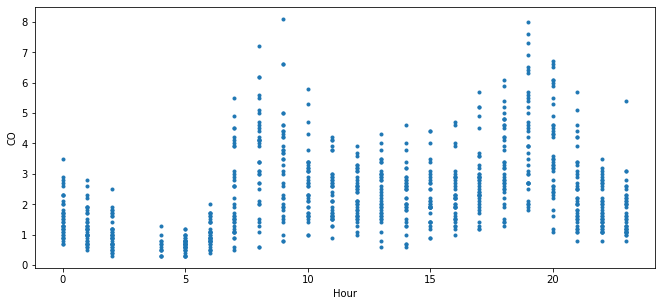

In [8]:
plt.plot(X, T, '.')
plt.xlabel(Xnames[0])
plt.ylabel(Tnames[0]);  # semi-colon here prevents printing the cryptic result of call to plt.ylabel()

### PART C.2 - APPLY GRADIENT DESCENT ADAM METHOD

In [9]:
def adam_and_plot(n_powers,n_steps,X,T):
    W = np.zeros((n_powers, 1))
    rho = 0.01
    W, error_sequence, W_sequence = gradient_descent_adam(polynomial_model, polynomial_gradient, rmse,
                                        X, T, W, rho, n_steps)
    plot1 = plt.figure(1)
   # fig = plt.figure()
    plt.plot(X, T, '.', label='Training Data')
    Xtest=np.linspace(0,23,100).reshape(-1,1)
    plt.plot(Xtest, polynomial_model(Xtest, W), label=f'Polynomial ({n_powers})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend();
    plt.show()
    
    plt.subplot(1, 2, 1)
    plt.plot(W_sequence)
    plt.xlabel('n_steps')
    plt.ylabel('Weight');
   # plt.show()

    #plt.tight_layout(2.0)
   
    #fig = plt.figure()
    plt.subplot(1, 2, 2)
    plt.plot(error_sequence)
    plt.xlabel('n_steps')
    plt.ylabel('RMSE');
    #plt.show()
    
  

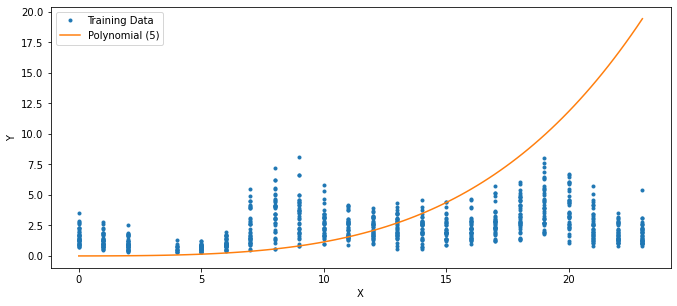

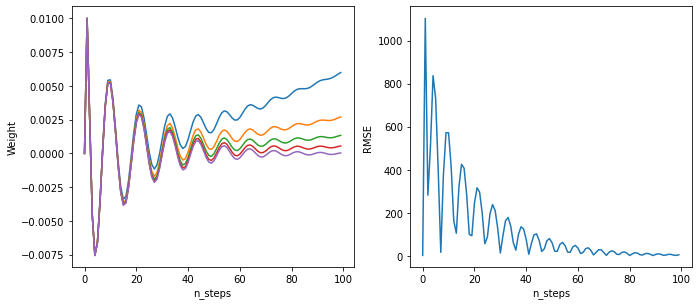

In [10]:
adam_and_plot(5,100,X,T)


## OBSERVATIONS :

1. For the problem under consideration, we are using Gradient Descent Adam to optimize fit the Polynomial model to
   the data. RMSE is the cost function. The goal is to minimize RMSE.
2. The polynomial model seems to be a good fit for this problem because from the above plot of the training data,    can see that there is curvature to the data. And polynomial fits a wide range of curvature.
3. The initial values of n_power = 5 and n_steps = 100 seems fairly good as the curve isn't overfitting or
   underfitting too much.Thus, we can proceed to gradually alter the value of n_power and n_steps to arrive at 
   the optimal value.
4. After observing the model prediction, on analysing the Error curve, we can see that the cost function
   (RMSE) has gradually decreased from above 1000 to somewhere around 50 and started to stabilize. This is a good
   indication that we have chosen good initial parameters.
5. We cannot say much about the value of the weights as they are not horizontal lines. 

### PART C.3 -  OPTIMIZATION

#### Modify N_POWER while keeping N_STEPS constant

#### n_power = 2, n_steps = 100

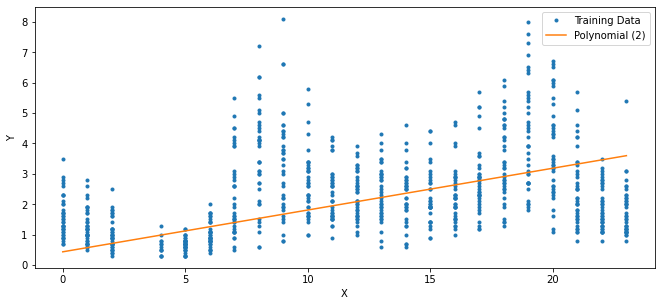

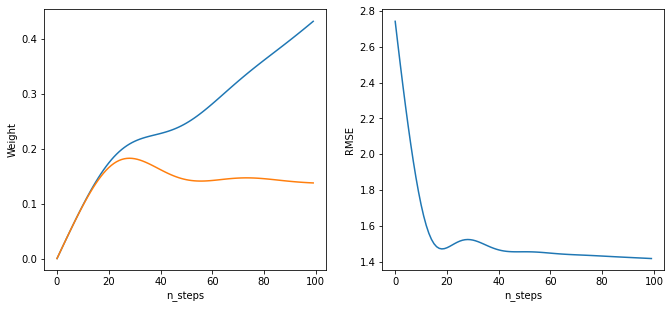

In [11]:
adam_and_plot(2,100,X,T)

#### n_power = 3, n_steps = 100

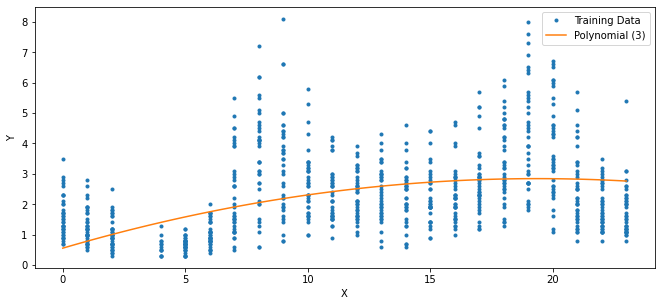

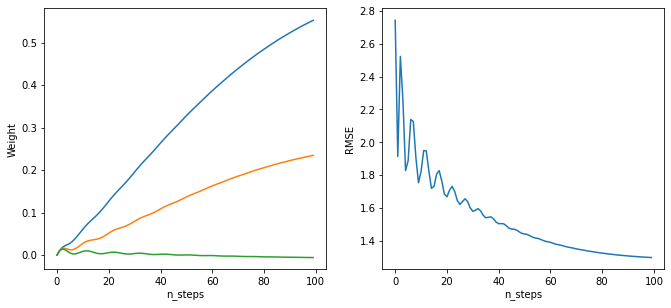

In [12]:
adam_and_plot(3,100,X,T)

#### n_power = 4, n_steps = 100

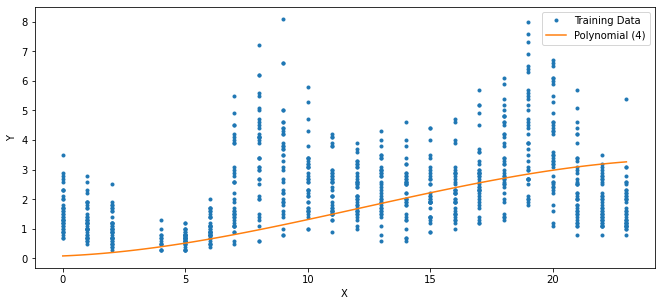

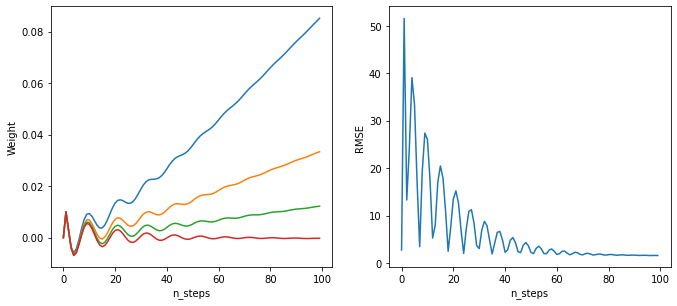

In [13]:
adam_and_plot(4,100,X,T)

#### n_power = 10, n_steps = 100

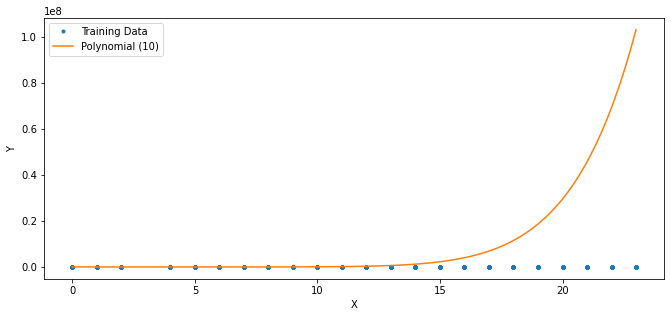

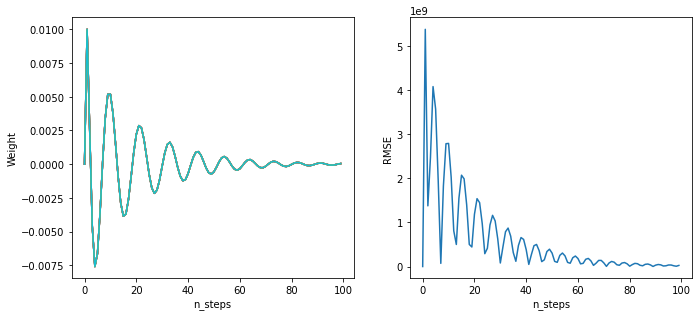

In [15]:
adam_and_plot(10,100,X,T)

#### n_power = 5, n_steps = 100

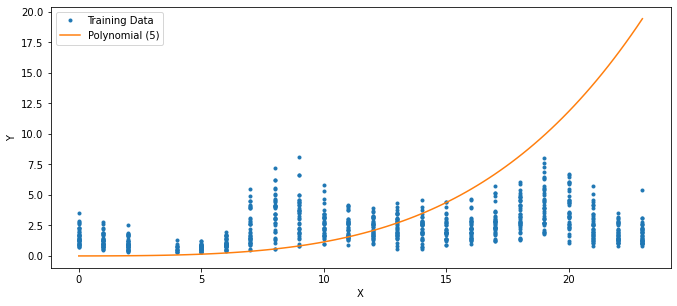

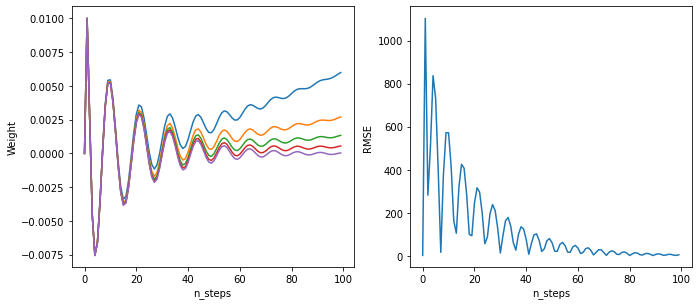

In [16]:
adam_and_plot(5,100,X,T)

#### Modify N_STEPS while keeping N_POWERS constant

#### n_power = 3, n_steps = 100

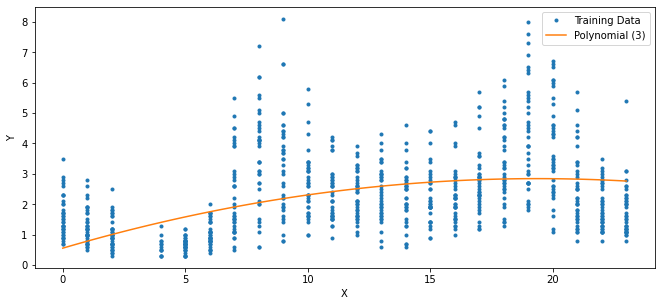

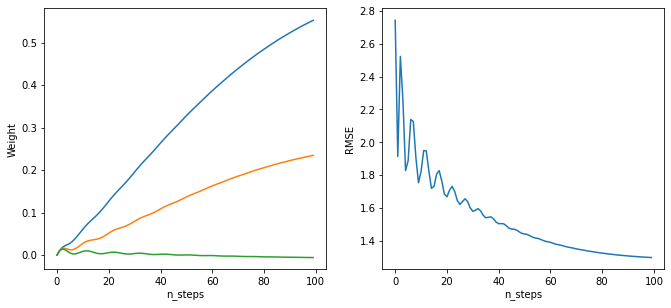

In [18]:
adam_and_plot(3,100,X,T)

#### n_power = 3, n_steps = 200

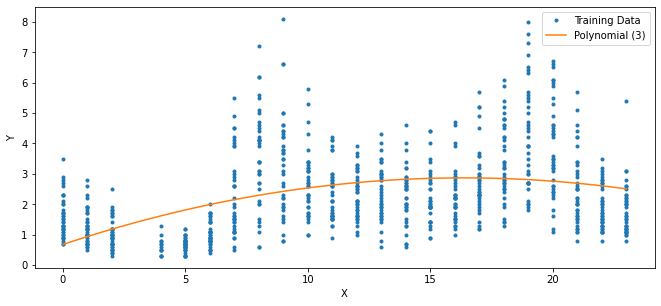

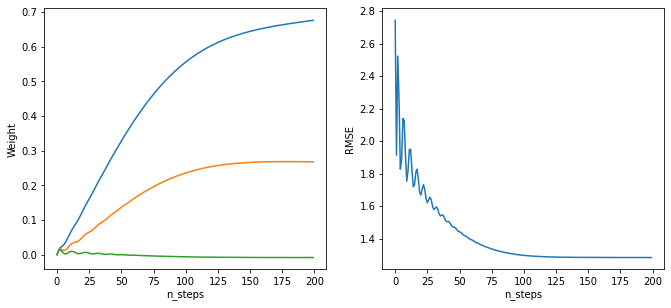

In [19]:
adam_and_plot(3,200,X,T)

#### n_power = 3, n_steps = 50

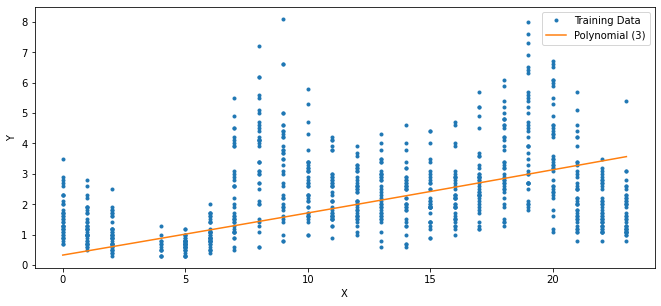

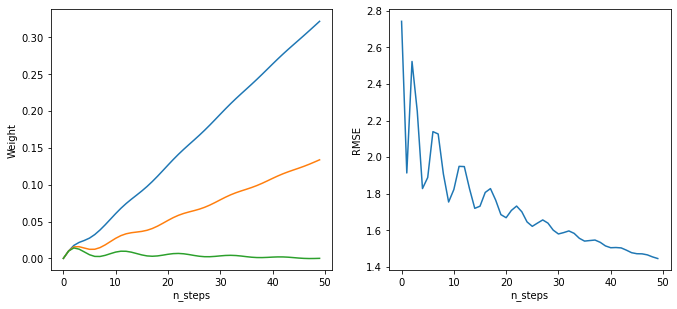

In [20]:
adam_and_plot(3,50,X,T)

#### MODIFY n_steps WHILE TAKING n_powers = 4

#### n_power = 4, n_steps = 100

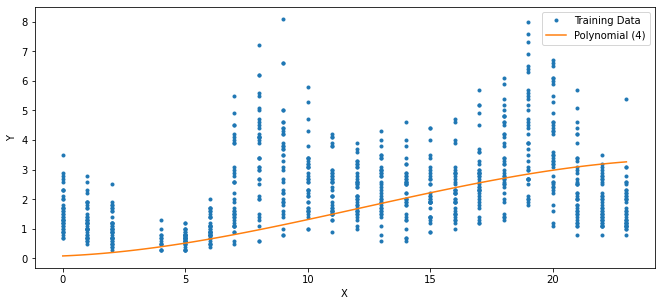

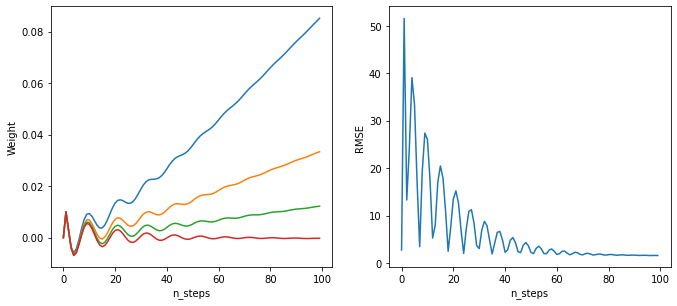

In [21]:
adam_and_plot(4,100,X,T)

#### n_power = 4, n_steps = 200

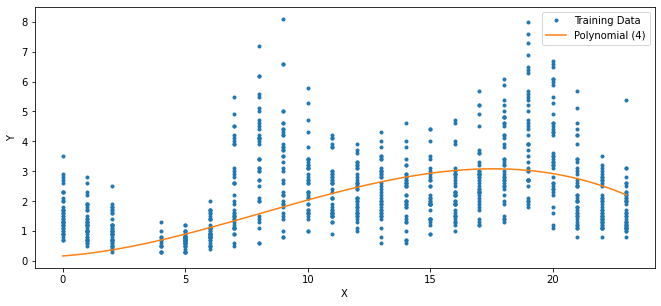

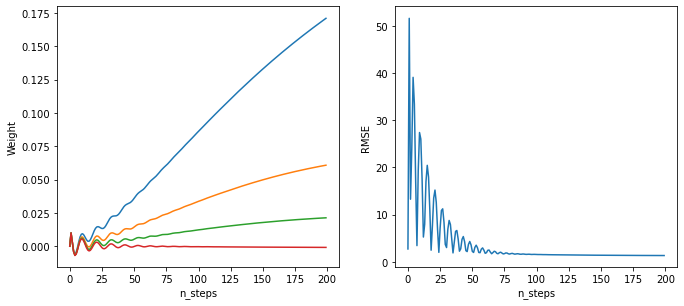

In [22]:
adam_and_plot(4,200,X,T)

#### n_power = 4, n_steps = 300

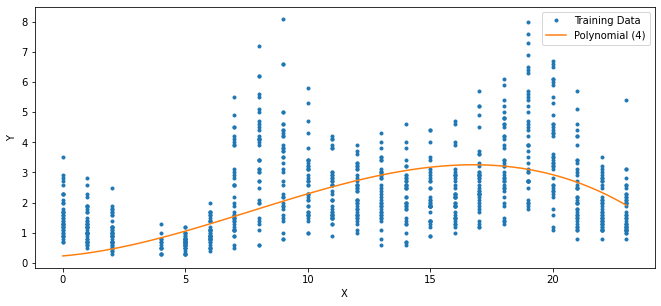

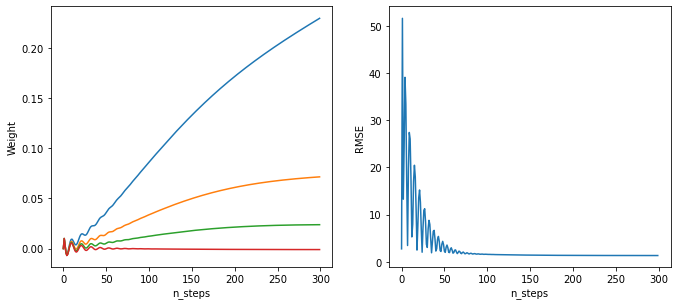

In [27]:
adam_and_plot(4,300,X,T)

#### n_power = 4, n_steps = 600

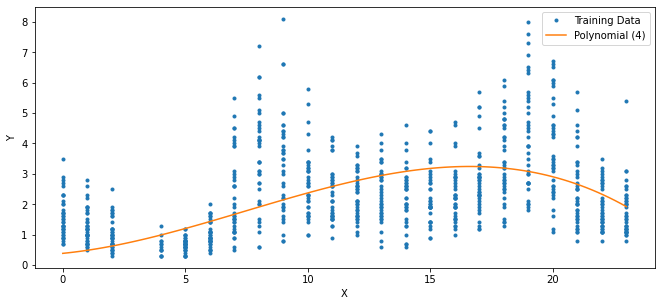

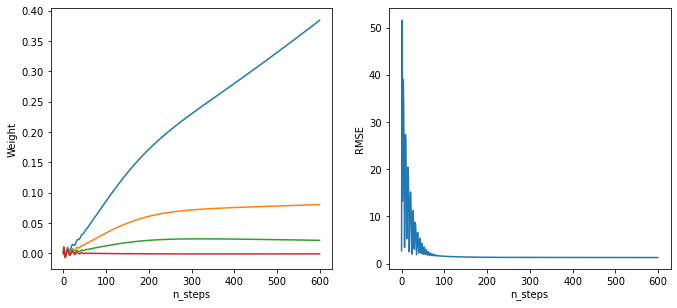

In [24]:
adam_and_plot(4,600,X,T)

#### n_power = 4, n_steps = 1000

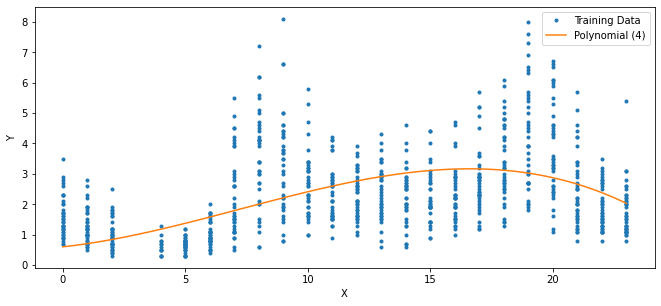

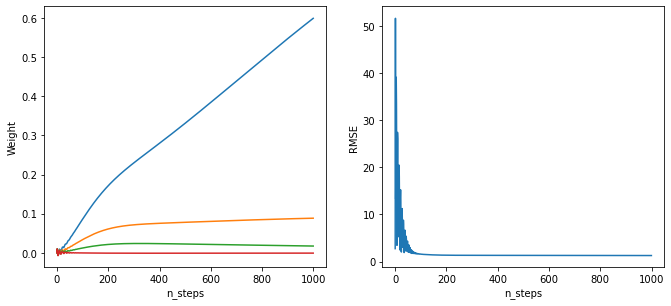

In [25]:
adam_and_plot(4,1000,X,T)

#### n_power = 4, n_steps = 800

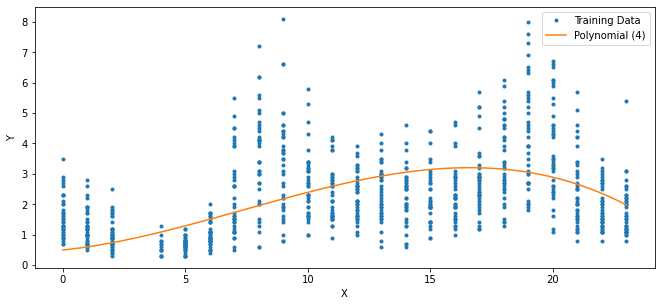

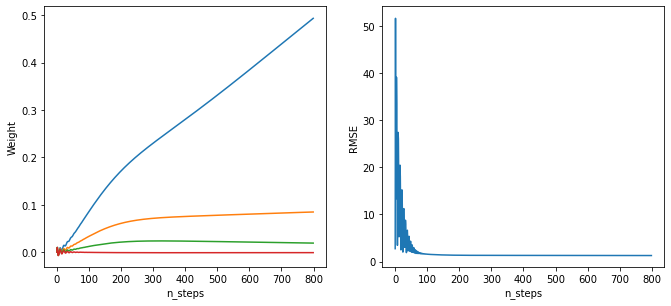

In [26]:
adam_and_plot(4,800,X,T)

#### n_power = 4, n_steps = 250

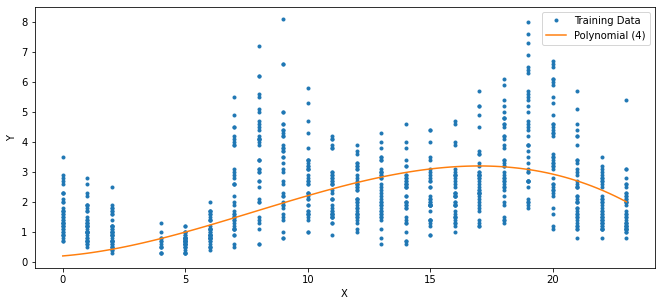

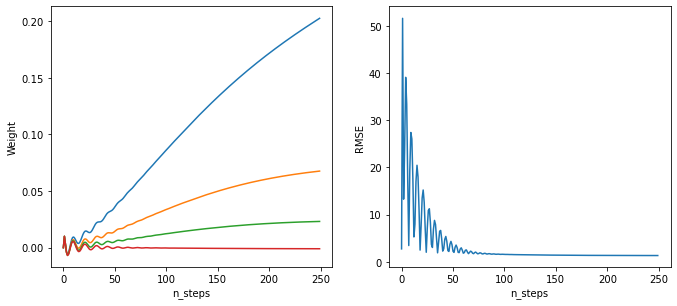

In [28]:
adam_and_plot(4,250,X,T)

## OBSERVATIONS FROM OPTIMIZATION TRIAL AND ERROR:

1. With the increasing degree of the polynomial, the complexity of the model also increases. Thus, 'n_power' 
   must be chosen precisely. If the value is low, then the model won't be able to fit the data properly and if it    is high, the model will overfit the data.
2. Multicollinearity is the interdependence between the predictors in multiple dimensional regression ( in this
   case, n_steps and n_power). Thus, it is challenging to fit the model properly on the dataset.
3. Choosing the perfect learning rate is a very important task as it depends on how large of a step we take
   downhill during each iteration. If we take too large of a step, we may step over the minimum. However, if we 
   take small steps, it will require many iterations to arrive at the minimum.
4. In this case, n_power was gradually increased from 2 to 10 and then brought down. The value 4
   seemed to give a better fit. So, in the next step, n_steps was varied keeping n_power=4.
5. Keeping n_power=4, n_steps was varied from 100 to 1000. A better fit was observed when n_steps >= 200 and
   <= 300. A more accurate observation is difficult from analysing only the graph.
6. The values of the 4 weights range between 0.00 and 0.20.
7. We have observed that the best choice of n_power is 4. To find the optimal number of n_steps, we could run
   gradient_descent_adam() function for n_power = 4 and find the n_steps value between 200 and 300 which gives
   the least value of error.
8. The RMSE value decreases from around 50 in the beginning to the lowest (around 5) after about 80-90 iterations.

# Grading

Your notebook will be run and graded automatically. Test this grading process by first downloading [A1grader.tar](http://www.cs.colostate.edu/~anderson/cs545/notebooks/A1grader.tar) (to be provided soon) and extract `A1grader.py` from it. Run the code in the following cell to demonstrate an example grading session. You should see a perfect execution score of 60/60 if your functions are defined correctly. The remaining 40 points will be based on other testing and the results you obtain and your discussions. 

A different, but similar, grading script will be used to grade your checked-in notebook. It will include additional tests. You should design and perform additional tests on all of your functions to be sure they run correctly before checking in your notebook.  

For the grading script to run correctly, you must first name this notebook as 'Lastname-A1.ipynb' with 'Lastname' being your last name, and then save this notebook.

In [30]:
%run -i A1grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Gopinath-A1.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, -2, 3, -4, 5, -8, 9, -10]).reshape((-1, 1))
    W = np.ones((4, 1))
    Y = polynomial_model(X, W)
    T = np.array([[   4.2],
                  [  -4.8],
                  [  40.2],
                  [ -50.8],
                  [ 156.2],
                  [-454.8],
                  [ 820.2],
                  [-908.8]])
    gradient = polynomial_gradient(X, T, W)


--- 20/20 points. Returned correct values.

Testing
    X = np.array([1, 2, 3, 4, 5, 8, 9, 11]).reshape((-1, 1))
    T = (X - 5) * 0.05 + 0.002 * (X - 8)**2
    W = np.zeros((5, 1))
   